# Which tree species should the city plant?

## 📖 Background
You work for a nonprofit organization advising the planning department on ways to improve the quantity and quality of trees in New York City. The urban design team believes tree size (using trunk diameter as a proxy for size) and health are the most desirable characteristics of city trees.

The city would like to learn more about which tree species are the best choice to plant on the streets of Manhattan.

## 💾 The data
The team has provided access to the 2015 tree census and geographical information on New York City neighborhoods ([trees](https://data.cityofnewyork.us/Environment/2015-Street-Tree-Census-Tree-Data/uvpi-gqnh), [neighborhoods](https://data.cityofnewyork.us/City-Government/NTA-map/d3qk-pfyz)):

#### Tree Census
- "tree_id" - Unique id of each tree.
- "tree_dbh" - The diameter of the tree in inches measured at 54 inches above the ground.
- "curb_loc" - Location of the tree bed in relation to the curb. Either along the curb (OnCurb) or offset from the curb (OffsetFromCurb).
- "spc_common" - Common name for the species.
- "status" - Indicates whether the tree is alive or standing dead.
- "health" - Indication of the tree's health (Good, Fair, and Poor).
- "root_stone" - Indicates the presence of a root problem caused by paving stones in the tree bed.
- "root_grate" - Indicates the presence of a root problem caused by metal grates in the tree bed.
- "root_other" - Indicates the presence of other root problems.
- "trunk_wire" - Indicates the presence of a trunk problem caused by wires or rope wrapped around the trunk.
- "trnk_light" - Indicates the presence of a trunk problem caused by lighting installed on the tree.
- "trnk_other" - Indicates the presence of other trunk problems.
- "brch_light" - Indicates the presence of a branch problem caused by lights or wires in the branches.
- "brch_shoe" - Indicates the presence of a branch problem caused by shoes in the branches.
- "brch_other" - Indicates the presence of other branch problems.
- "postcode" - Five-digit zip code where the tree is located.
- "nta" - Neighborhood Tabulation Area (NTA) code from the 2010 US Census for the tree.
- "nta_name" - Neighborhood name.
- "latitude" - Latitude of the tree, in decimal degrees.
- "longitude" - Longitude of the tree, in decimal degrees.

#### Neighborhoods' geographical information
- "ntacode" - NTA code (matches Tree Census information).
- "ntaname" - Neighborhood name (matches Tree Census information).
- "geometry" - Polygon that defines the neighborhood.

_Tree census and neighborhood information from the City of New York [NYC Open Data](https://opendata.cityofnewyork.us/data/)._

In [94]:
import pandas as pd
import geopandas as gpd
trees = pd.read_csv('data/trees.csv')
trees

,tree_id,tree_dbh,curb_loc,spc_common,status,health,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,postcode,nta,nta_name,latitude,longitude
0,190422,11,OnCurb,honeylocust,Alive,Good,No,No,No,No,No,No,No,No,No,10023,MN14,Lincoln Square,40.770046,-73.984950
1,190426,11,OnCurb,honeylocust,Alive,Good,No,No,No,No,No,No,No,No,No,10023,MN14,Lincoln Square,40.770210,-73.985338
2,208649,9,OnCurb,American linden,Alive,Good,No,Yes,No,No,No,No,No,No,No,10019,MN15,Clinton,40.762724,-73.987297
3,193310,14,OnCurb,honeylocust,Alive,Good,No,No,Yes,No,No,Yes,No,No,Yes,10021,MN40,Upper East Side-Carnegie Hill,40.772171,-73.960456
4,199760,4,OnCurb,willow oak,Alive,Fair,No,No,No,No,No,No,No,No,No,10024,MN12,Upper West Side,40.782087,-73.980964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64224,208765,11,OnCurb,honeylocust,Alive,Good,No,No,Yes,No,No,No,No,No,No,10065,MN31,Lenox Hill-Roosevelt Island,40.763224,-73.960984
64225,170513,9,OnCurb,honeylocust,Alive,Good,No,No,No,No,No,No,No,No,No,10280,MN25,Battery Park City-Lower Manhattan,40.707884,-74.017598
64226,190040,10,OnCurb,honeylocust,Alive,Good,No,No,No,No,No,No,No,No,No,10024,MN12,Upper West Side,40.786150,-73.971152
64227,191269,12,OnCurb,ginkgo,Alive,Good,No,No,No,No,No,No,No,No,No,10010,MN21,Gramercy,40.739270,-73.983960


In [95]:
neighborhoods = gpd.read_file('data/nta.shp')
neighborhoods

,borocode,boroname,countyfips,ntacode,ntaname,shape_area,shape_leng,geometry
0,3.0,Brooklyn,047,BK43,Midwood,3.579964e+07,27996.591274,"POLYGON ((-73.94733 40.62917, -73.94687 40.626..."
1,3.0,Brooklyn,047,BK75,Bedford,3.262983e+07,29992.919174,"POLYGON ((-73.94193 40.70073, -73.94439 40.700..."
2,2.0,Bronx,005,BX40,Fordham South,6.307284e+06,15878.272921,"POLYGON ((-73.89138 40.86170, -73.89106 40.861..."
3,3.0,Brooklyn,047,BK88,Borough Park,5.400502e+07,39247.227722,"POLYGON ((-73.97605 40.63128, -73.97717 40.630..."
4,3.0,Brooklyn,047,BK96,Rugby-Remsen Village,3.270695e+07,30957.853395,"POLYGON ((-73.90856 40.65210, -73.90945 40.651..."
...,...,...,...,...,...,...,...,...
190,2.0,Bronx,005,BX63,West Concourse,1.936954e+07,28550.700370,"POLYGON ((-73.91192 40.84326, -73.91194 40.843..."
191,4.0,Queens,081,QN17,Forest Hills,5.782845e+07,36183.607828,"POLYGON ((-73.83103 40.71434, -73.83115 40.714..."
192,4.0,Queens,081,QN99,park-cemetery-etc-Queens,3.116850e+08,490146.604020,"MULTIPOLYGON (((-73.86523 40.57046, -73.86454 ..."
193,4.0,Queens,081,QN03,Springfield Gardens South-Brookville,4.326375e+07,45266.267875,"POLYGON ((-73.75763 40.66645, -73.75756 40.666..."


## 💪 Challenge
Create a report that covers the following:
* What are the most common tree species in Manhattan?
* Which are the neighborhoods with the most trees?
* A visualization of Manhattan's neighborhoods and tree locations.
* What ten tree species would you recommend the city plant in the future?

## 🧑‍⚖️ Judging criteria

| CATEGORY | WEIGHTING | DETAILS                                                              |
|:---------|:----------|:---------------------------------------------------------------------|
| **Response quality** | 85%       | <ul><li> Accuracy (30%) - The response must be representative of the original data and free from errors.</li><li> Clarity (25%) - The response must be easy to understand and clearly expressed.</li><li> Completeness (30%) - The response must be a full report that responds to the questions posed.</li></ul>       |
| **Presentation** | 15% | <ul><li>How legible/understandable the response is.</li><li>How well-formatted the response is.</li><li>Spelling and grammar.</li></ul> |

In the event of a tie, earlier submission time will be used as a tie-breaker. 

## 📘 Rules
To be eligible to win, you must:
* Submit your response before the deadline. 
All responses must be submitted in English.

Entrants must be:
* 18+ years old.
* Allowed to take part in a skill-based competition from their country.
Entrants can not:
* Be in a country currently sanctioned by the U.S. government.

## ✅ Checklist before publishing
- Rename your workspace to make it descriptive of your work. N.B. you should leave the notebook name as notebook.ipynb.
- **Remove redundant cells** like the judging criteria, so the workbook is focused on your work.
- Check that all the cells run without error.

## ⌛️ Time is ticking. Good luck!

# Exploring and Cleaning the Data

## Trees Dataset
First lets remove any duplicate columns or columns with null values.

### Removing null values

In [96]:
#check types of columns
trees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64229 entries, 0 to 64228
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   tree_id     64229 non-null  int64  
 1   tree_dbh    64229 non-null  int64  
 2   curb_loc    64229 non-null  object 
 3   spc_common  62428 non-null  object 
 4   status      64229 non-null  object 
 5   health      62427 non-null  object 
 6   root_stone  64229 non-null  object 
 7   root_grate  64229 non-null  object 
 8   root_other  64229 non-null  object 
 9   trunk_wire  64229 non-null  object 
 10  trnk_light  64229 non-null  object 
 11  trnk_other  64229 non-null  object 
 12  brch_light  64229 non-null  object 
 13  brch_shoe   64229 non-null  object 
 14  brch_other  64229 non-null  object 
 15  postcode    64229 non-null  int64  
 16  nta         64229 non-null  object 
 17  nta_name    64229 non-null  object 
 18  latitude    64229 non-null  float64
 19  longitude   64229 non-nul

In total there are 64228 entries in the trees dataset. There are a few columns with null values lets see how many of each column have null values.

In [97]:
trees.isnull().sum()

tree_id          0
tree_dbh         0
curb_loc         0
spc_common    1801
status           0
health        1802
root_stone       0
root_grate       0
root_other       0
trunk_wire       0
trnk_light       0
trnk_other       0
brch_light       0
brch_shoe        0
brch_other       0
postcode         0
nta              0
nta_name         0
latitude         0
longitude        0
dtype: int64

Looking above we see that the `spc_common` and the `health` columns have 1801, and 1802 entries with missing values. Since these columns are both important to our analysis we are going to drop these columns with null values.

In [98]:
#drops all columns with null values, create new dataset called trees_cleaned
trees_cleaned = trees.dropna(axis=0, how='any')
#check if any null values
trees_cleaned.isnull().sum()

tree_id       0
tree_dbh      0
curb_loc      0
spc_common    0
status        0
health        0
root_stone    0
root_grate    0
root_other    0
trunk_wire    0
trnk_light    0
trnk_other    0
brch_light    0
brch_shoe     0
brch_other    0
postcode      0
nta           0
nta_name      0
latitude      0
longitude     0
dtype: int64

### Removing any duplicate values

In [99]:
#removes any duplicate rows
trees_cleaned = trees_cleaned.drop_duplicates()

In [100]:
#see new info on trees_cleaned
trees_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62427 entries, 0 to 64228
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   tree_id     62427 non-null  int64  
 1   tree_dbh    62427 non-null  int64  
 2   curb_loc    62427 non-null  object 
 3   spc_common  62427 non-null  object 
 4   status      62427 non-null  object 
 5   health      62427 non-null  object 
 6   root_stone  62427 non-null  object 
 7   root_grate  62427 non-null  object 
 8   root_other  62427 non-null  object 
 9   trunk_wire  62427 non-null  object 
 10  trnk_light  62427 non-null  object 
 11  trnk_other  62427 non-null  object 
 12  brch_light  62427 non-null  object 
 13  brch_shoe   62427 non-null  object 
 14  brch_other  62427 non-null  object 
 15  postcode    62427 non-null  int64  
 16  nta         62427 non-null  object 
 17  nta_name    62427 non-null  object 
 18  latitude    62427 non-null  float64
 19  longitude   62427 non-nul

In [101]:
#compare size of data frames
print('Trees dataset original length: ', len(trees), 
      "\nTrees length without duplicates or null data:", len(trees_cleaned),
      "\nNumber of rows with at least 1 NA value: ", (len(trees) - len(trees_cleaned)))

Trees dataset original length:  64229 
Trees length without duplicates or null data: 62427 
Number of rows with at least 1 NA value:  1802


### Removing redundant columns unnecessary to our analysis.
Looking at our data dictionary above there are several columns that are not needed to complete our analysis. We are going to remove these columns.
The columns we will keep are:
- "tree_id" - Unique id of each tree.
- "spc_common" - Common name for the species.
- "status" - Indicates whether the tree is alive or standing dead.
- "health" - Indication of the tree's health (Good, Fair, and Poor).
- "postcode" - Five-digit zip code where the tree is located.
- "nta" - Neighborhood Tabulation Area (NTA) code from the 2010 US Census for the tree.
- "nta_name" - Neighborhood name.
- "latitude" - Latitude of the tree, in decimal degrees.
- "longitude" - Longitude of the tree, in decimal degrees.

In [102]:
#columns to be removed
dropped_cols = [
    'tree_dbh',
    'curb_loc',
    'root_stone',
    'root_grate',
    'root_other',
    'trunk_wire',
    'trnk_light',
    'trnk_other',
    'brch_light',
    'brch_shoe',
    'brch_other',
]

#drop columns
trees_cleaned = trees_cleaned.drop(columns=dropped_cols)

#display new dataframe
trees_cleaned.head()

,tree_id,spc_common,status,health,postcode,nta,nta_name,latitude,longitude
0,190422,honeylocust,Alive,Good,10023,MN14,Lincoln Square,40.770046,-73.984950
1,190426,honeylocust,Alive,Good,10023,MN14,Lincoln Square,40.770210,-73.985338
2,208649,American linden,Alive,Good,10019,MN15,Clinton,40.762724,-73.987297
3,193310,honeylocust,Alive,Good,10021,MN40,Upper East Side-Carnegie Hill,40.772171,-73.960456
4,199760,willow oak,Alive,Fair,10024,MN12,Upper West Side,40.782087,-73.980964


### Renaming columns
Next we are going to rename some columns so that they are more aligned with the names in our neighborhoods dataset.


In [129]:
#dict of columns to be renamed
trees_cleaned = trees_cleaned.rename(columns={'nta':'nta_code'})
trees_cleaned.head()

,tree_id,spc_common,status,health,postcode,nta_code,nta_name,latitude,longitude
0,190422,honeylocust,Alive,Good,10023,MN14,Lincoln Square,40.770046,-73.984950
1,190426,honeylocust,Alive,Good,10023,MN14,Lincoln Square,40.770210,-73.985338
2,208649,American linden,Alive,Good,10019,MN15,Clinton,40.762724,-73.987297
3,193310,honeylocust,Alive,Good,10021,MN40,Upper East Side-Carnegie Hill,40.772171,-73.960456
4,199760,willow oak,Alive,Fair,10024,MN12,Upper West Side,40.782087,-73.980964


## Neighborhoods dataset

In [104]:
neighborhoods.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   borocode    195 non-null    float64 
 1   boroname    195 non-null    object  
 2   countyfips  195 non-null    object  
 3   ntacode     195 non-null    object  
 4   ntaname     195 non-null    object  
 5   shape_area  195 non-null    float64 
 6   shape_leng  195 non-null    float64 
 7   geometry    195 non-null    geometry
dtypes: float64(3), geometry(1), object(4)
memory usage: 12.3+ KB


The neighborhoods dataset is complete. It has no null values.

In [105]:
neighborhoods.head()

,borocode,boroname,countyfips,ntacode,ntaname,shape_area,shape_leng,geometry
0,3.0,Brooklyn,047,BK43,Midwood,3.579964e+07,27996.591274,"POLYGON ((-73.94733 40.62917, -73.94687 40.626..."
1,3.0,Brooklyn,047,BK75,Bedford,3.262983e+07,29992.919174,"POLYGON ((-73.94193 40.70073, -73.94439 40.700..."
2,2.0,Bronx,005,BX40,Fordham South,6.307284e+06,15878.272921,"POLYGON ((-73.89138 40.86170, -73.89106 40.861..."
3,3.0,Brooklyn,047,BK88,Borough Park,5.400502e+07,39247.227722,"POLYGON ((-73.97605 40.63128, -73.97717 40.630..."
4,3.0,Brooklyn,047,BK96,Rugby-Remsen Village,3.270695e+07,30957.853395,"POLYGON ((-73.90856 40.65210, -73.90945 40.651..."


### Renaming Columns in Neighborhoods dataset
We're going to rename a few columns in our dataset so that they are aligned with the column names in the trees_cleaned dataset.

In [106]:
#cols to be renamed
cols_map = {
    'boro_code':'boro_code',
    'boroname':'boro_name',
    'countyfips':'county_fips',
    'ntacode':'nta_code',
    'ntaname':'nta_name',
}

neighbourhoods_cleaned = neighborhoods.rename(columns = cols_map)
neighbourhoods_cleaned.head()

,borocode,boro_name,county_fips,nta_code,nta_name,shape_area,shape_leng,geometry
0,3.0,Brooklyn,047,BK43,Midwood,3.579964e+07,27996.591274,"POLYGON ((-73.94733 40.62917, -73.94687 40.626..."
1,3.0,Brooklyn,047,BK75,Bedford,3.262983e+07,29992.919174,"POLYGON ((-73.94193 40.70073, -73.94439 40.700..."
2,2.0,Bronx,005,BX40,Fordham South,6.307284e+06,15878.272921,"POLYGON ((-73.89138 40.86170, -73.89106 40.861..."
3,3.0,Brooklyn,047,BK88,Borough Park,5.400502e+07,39247.227722,"POLYGON ((-73.97605 40.63128, -73.97717 40.630..."
4,3.0,Brooklyn,047,BK96,Rugby-Remsen Village,3.270695e+07,30957.853395,"POLYGON ((-73.90856 40.65210, -73.90945 40.651..."


# What are the most common species of tree in Manhattan?

In [223]:
#get top 10 most common species of tree in manhattan
manhattan_top10 = trees_cleaned['spc_common'].value_counts()[:10].sort_values(ascending=False)
manhattan_top10

honeylocust          13175
Callery pear          7297
ginkgo                5859
pin oak               4584
Sophora               4453
London planetree      4122
Japanese zelkova      3596
littleleaf linden     3333
American elm          1698
American linden       1583
Name: spc_common, dtype: int64

Text(0, 0.5, 'Count')

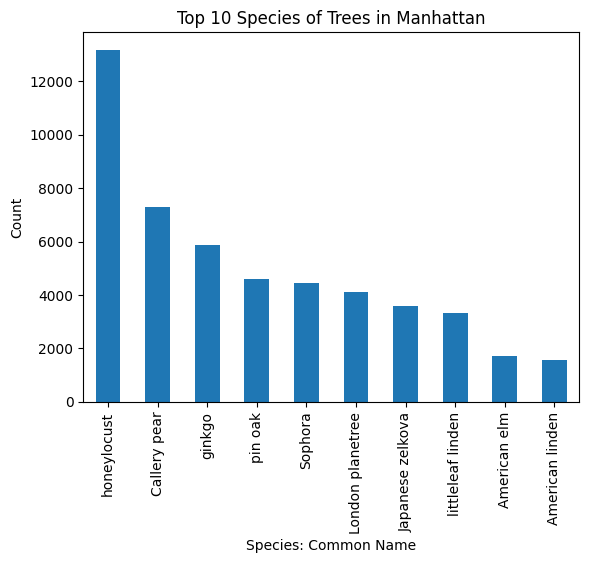

In [224]:
import matplotlib.pyplot as plt
import seaborn as sns

manhattan_top10.plot(kind='bar')
plt.title('Top 10 Species of Trees in Manhattan')
plt.xlabel('Species: Common Name')
plt.ylabel('Count')

## Conclusion
The top 10 most common species of tree in Manhattan Are as follows:

1. Honeylocust: 13175
2. Callery pear: 7297
3. Ginkgo: 5859
4. Pin Oak: 4584
5. Sophora: 4453
6. London Planetree: 4122
7. Japanese Zelkova: 3596
8. Littleleaf Linden: 3333
9. American Elm: 1698
10. American Linden: 1583

# What are the neighbourhoods with the most trees?

In [227]:
#get top 5 neghbourhoods with most trees
neighbourhoods_top5 = trees_cleaned['nta_name'].value_counts()[:5].sort_values(ascending=False)
neighbourhoods_top5

Upper West Side                               5723
Upper East Side-Carnegie Hill                 4540
West Village                                  3715
Central Harlem North-Polo Grounds             3355
Hudson Yards-Chelsea-Flatiron-Union Square    2797
Name: nta_name, dtype: int64

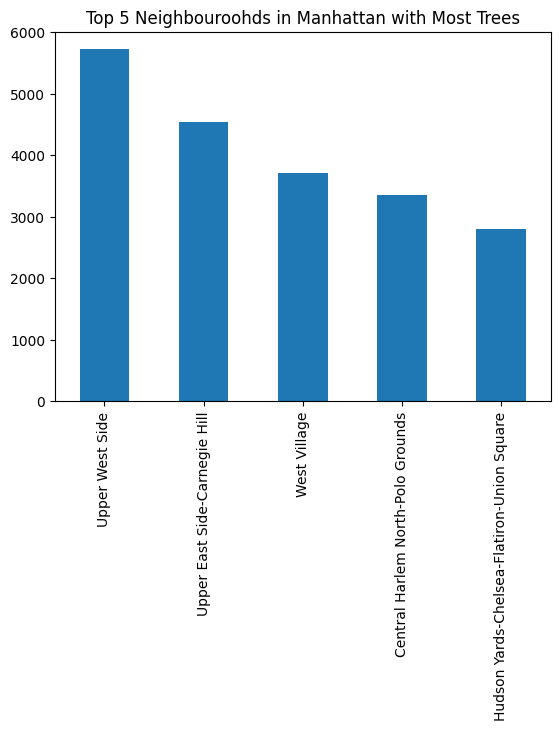

In [226]:
#plot top 5
neighbourhoods_top5.plot(kind='bar')
plt.title('Top 5 Neighbouroohds in Manhattan with Most Trees')
#show plot
plt.show()

## 4 Neighbourhoods Bordering in top 5 neighbourhoods with most Trees in Manhattan
The top 5 neighbourhoods in Manhattan with the most trees are as follows:
1. Upper West Side: 5723
2. Upper East Side-Carnegie Hill: 4540
3. West Village: 3715
4. Central Harlem North-Polo Grounds: 3355
5. Hudson Yards-Chelsea-Flatiron-Union Square: 2797

An interesting thing to note for the stats above is that Central park borders 4 different neighbourhoods in Manhattan: Harlem to the north, the Upper East Side to the east, Upper West Side to the west, and Midtown Manhattan to the south. This makes the top 5 make a lot of sense considering that 4 out of the top 5 neighbourhoods with most trees are ones that are bordering Central Park. Note that West Village is in Midtown Manhattan.

In [139]:
#merge datasets
trees_neighborhoods_merged_1 = pd.merge(trees_cleaned, neighbourhoods_cleaned, on='nta_code', how='inner')

#check new dataframe
trees_neighborhoods_merged_1.head()

,tree_id,spc_common,status,health,postcode,nta_code,nta_name_x,latitude,longitude,borocode,boro_name,county_fips,nta_name_y,shape_area,shape_leng,geometry
0,190422,honeylocust,Alive,Good,10023,MN14,Lincoln Square,40.770046,-73.984950,1.0,Manhattan,061,Lincoln Square,1.580567e+07,19866.053195,"POLYGON ((-73.97500 40.77753, -73.97546 40.776..."
1,190426,honeylocust,Alive,Good,10023,MN14,Lincoln Square,40.770210,-73.985338,1.0,Manhattan,061,Lincoln Square,1.580567e+07,19866.053195,"POLYGON ((-73.97500 40.77753, -73.97546 40.776..."
2,187056,honeylocust,Alive,Good,10023,MN14,Lincoln Square,40.770396,-73.981627,1.0,Manhattan,061,Lincoln Square,1.580567e+07,19866.053195,"POLYGON ((-73.97500 40.77753, -73.97546 40.776..."
3,187058,honeylocust,Alive,Good,10023,MN14,Lincoln Square,40.770227,-73.981218,1.0,Manhattan,061,Lincoln Square,1.580567e+07,19866.053195,"POLYGON ((-73.97500 40.77753, -73.97546 40.776..."
4,190423,honeylocust,Alive,Good,10023,MN14,Lincoln Square,40.770087,-73.985048,1.0,Manhattan,061,Lincoln Square,1.580567e+07,19866.053195,"POLYGON ((-73.97500 40.77753, -73.97546 40.776..."
